In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
full = cv2.imread("DATA/sammy.jpg") # doggo
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)    

face = cv2.imread("DATA/sammy_face.jpg") # doggo face
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

---
# Comparison Methods

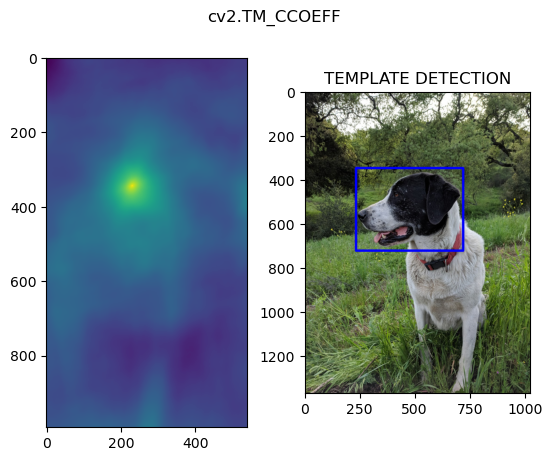

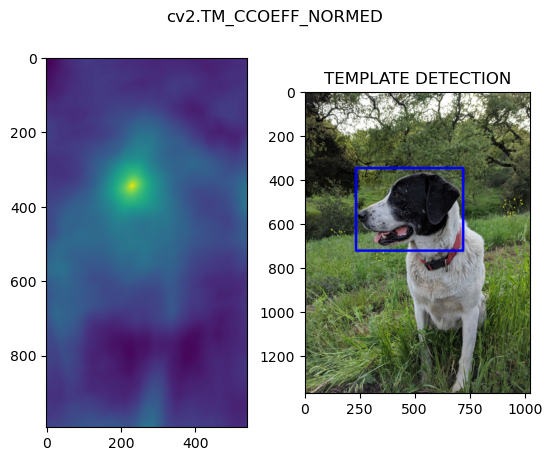

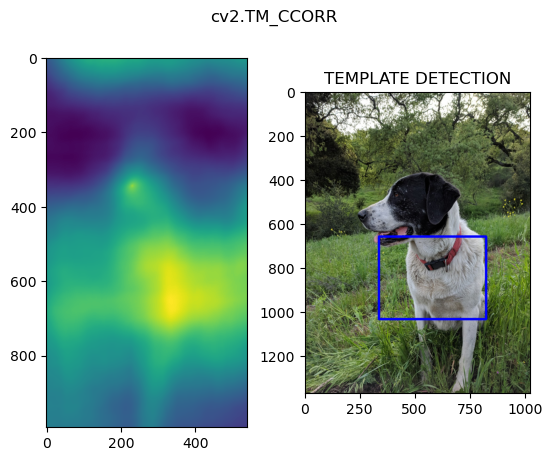

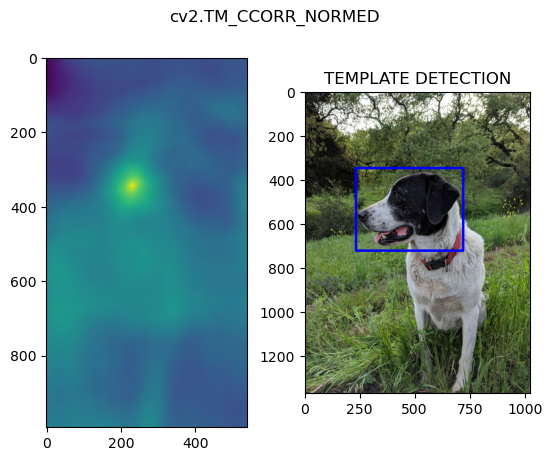

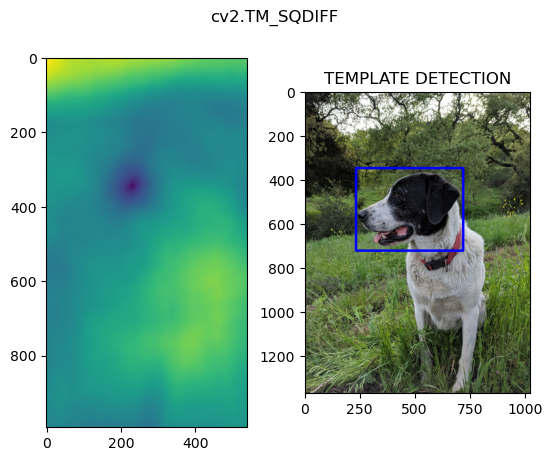

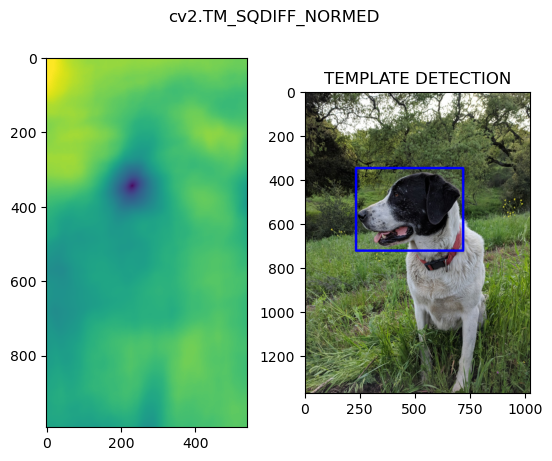

In [9]:
Methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR", "cv2.TM_CCORR_NORMED", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]

# only the SQDIFF methods find the face by looking for the minimum value
# the rest of the methods look for the maximum value

# cool note: some of the methods like TM_CCOEFF displays the image like a heat map.
# the brighter the spot on the heat map, the more likely it is to be the face.

for m in Methods:
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the method
    method = eval(m) # eval() evaluates a string as a line of code, including methods!
    
    # Template Matching
    res = cv2.matchTemplate(full_copy, face, method)
    min_value, max_value, min_loc, max_loc = cv2.minMaxLoc(res) # obtain points to draw a rectangle on the face.
    
    # Account for the two sqdiff methods
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: # these two methods work differently
        top_left = min_loc # top left corner of the rectangle
    else:
        top_left = max_loc
    
    height, width, channels = face.shape # get the height and width of the face image
    bottom_right = (top_left[0] + width, top_left[1] + height) # bottom right corner of the rectangle
    
    cv2.rectangle(full_copy, top_left, bottom_right, (0,0,255), thickness=10) # draw the rectangle
    
    # Plot and show the images
    plt.subplot(121) # 1 row, 2 columns, 1st subplot
    plt.imshow(res) # plot the heat map
    
    plt.subplot(122) # 1 row, 2 columns, 2nd subplot
    plt.imshow(full_copy) # plot the image with the rectangle
    plt.title("TEMPLATE DETECTION")
    plt.suptitle(m) # title using the method name.
    
    plt.show() # show all the plots.
    print("\n")
    print("\n")